# HOMEWORK # 4

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv('data.csv')

In [58]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [59]:
selected_columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style','highway MPG', 'city mpg', 'MSRP']
selected_columns

['Make',
 'Model',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'MSRP']

In [60]:
df = data[selected_columns]
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible
highway MPG,26,28,28,28,28
city mpg,19,19,20,18,18
MSRP,46135,40650,36350,29450,34500


In [61]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [62]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [63]:
df.head().T

,0,1,2,3,4
make,BMW,BMW,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series,1 Series,1 Series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
msrp,46135,40650,36350,29450,34500


In [64]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [65]:
# Fill missing values with 0 for all selected columns
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [66]:
average_price = df['msrp'].mean()
df['above_average'] = (df['msrp'] > average_price).astype(int)

In [67]:
df.head().T

,0,1,2,3,4
make,BMW,BMW,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series,1 Series,1 Series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
msrp,46135,40650,36350,29450,34500


In [77]:
from sklearn.model_selection import train_test_split

# Split the data into train and temp sets (80% train/temp, 20% test)
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=1)

# Split the temp set into train and validation sets (60% train, 20% validation)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Print the shapes of the resulting datasets
print("Train set shape:", df_train.shape)
print("Validation set shape:", df_val.shape)
print("Test set shape:", df_test.shape)

Train set shape: (7148, 11)
Validation set shape: (2383, 11)
Test set shape: (2383, 11)


In [78]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
above_average          int64
dtype: object

In [79]:
from sklearn.metrics import roc_auc_score

# List of numerical variables to evaluate
numerical_variables = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

# Initialize a dictionary to store AUC scores
auc_scores = {}

# Loop through each numerical variable
for variable in numerical_variables:
    auc = roc_auc_score(df_train['above_average'], df_train[variable])
    
    # If AUC is < 0.5, invert the variable
    if auc < 0.5:
        auc = roc_auc_score(df_train['above_average'], -df_train[variable])
    
    auc_scores[variable] = auc

# Find the variable with the highest AUC
best_variable = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_variable]

print("AUC Scores:")
for variable, auc in auc_scores.items():
    print(f"{variable}: {auc:.4f}")

print(f"The numerical variable with the highest AUC is {best_variable} with AUC = {best_auc:.4f}")

AUC Scores:
engine_hp: 0.9171
engine_cylinders: 0.7661
highway_mpg: 0.6331
city_mpg: 0.6734
The numerical variable with the highest AUC is engine_hp with AUC = 0.9171


In [80]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Assuming you have already split your data into train and validation sets (df_train and df_val)

# Select the columns for one-hot encoding (categorical variables)
categorical_columns = ['make', 'model', 'transmission_type', 'vehicle_style']

# Use DictVectorizer for one-hot encoding
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(df_train[categorical_columns].to_dict(orient='records'))
X_val_encoded = dv.transform(df_val[categorical_columns].to_dict(orient='records'))

# Train a logistic regression model
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
lr.fit(X_train_encoded, df_train['above_average'])

# Make predictions on the validation set
val_predictions = lr.predict_proba(X_val_encoded)[:, 1]  # Probability of class 1 (above_average)

# Calculate the AUC on the validation dataset
auc = roc_auc_score(df_val['above_average'], val_predictions)

# Round the AUC to 3 digits
rounded_auc = round(auc, 3)

print("AUC on the validation dataset:", rounded_auc)

AUC on the validation dataset: 0.972


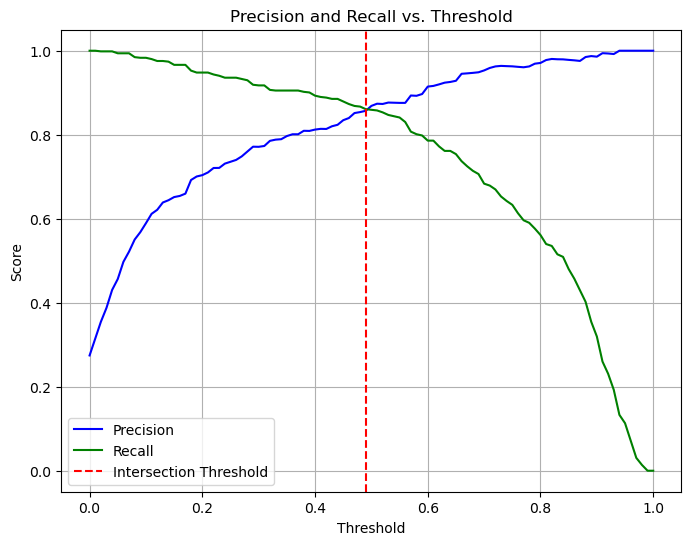

The threshold where precision and recall curves intersect: 0.49


In [81]:
from sklearn.metrics import precision_score, recall_score

# Assuming you have already trained the logistic regression model and made predictions on the validation set

# Generate a range of thresholds from 0.0 to 1.0 with step 0.01
thresholds = np.arange(0, 1.01, 0.01)

# Initialize lists to store precision and recall values for each threshold
precisions = []
recalls = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    # Apply the threshold to the predicted probabilities
    y_pred_thresholded = (val_predictions >= threshold).astype(int)
    
    # Compute precision and recall
    precision = precision_score(df_val['above_average'], y_pred_thresholded, zero_division=1)
    recall = recall_score(df_val['above_average'], y_pred_thresholded)
    
    precisions.append(precision)
    recalls.append(recall)

# Plot precision and recall curves
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision and Recall vs. Threshold')
plt.grid(True)

# Find the threshold where precision and recall curves are closest
diff = np.abs(np.array(precisions) - np.array(recalls))
intersection_threshold = thresholds[np.argmin(diff)]

plt.axvline(x=intersection_threshold, color='red', linestyle='--', label='Intersection Threshold')
plt.legend()

plt.show()

print("The threshold where precision and recall curves intersect:", intersection_threshold)




In [82]:
# Generate a range of thresholds from 0.0 to 1.0 with step 0.01
thresholds = np.arange(0, 1.01, 0.01)

# Initialize lists to store F1 scores and corresponding thresholds
f1_scores = []

# Calculate F1 scores for each threshold
for threshold in thresholds:
    # Apply the threshold to the predicted probabilities
    y_pred_thresholded = (val_predictions >= threshold).astype(int)
    
    # Compute precision and recall
    precision = precision_score(df_val['above_average'], y_pred_thresholded, zero_division=1)
    recall = recall_score(df_val['above_average'], y_pred_thresholded)
    
    # Calculate F1 score using the formula
    f1 = 2 * (precision * recall) / (precision + recall)
    
    f1_scores.append(f1)

# Find the threshold where F1 score is maximal
max_f1_score = max(f1_scores)
max_f1_threshold = thresholds[f1_scores.index(max_f1_score)]

print("The threshold where F1 score is maximal:", max_f1_threshold)
print("Maximal F1 score:", max_f1_score)

The threshold where F1 score is maximal: 0.51
Maximal F1 score: 0.8657407407407408


In [87]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

categorical_cols = ["make", "model", "transmission_type", "vehicle_style"]
numerical_cols = ["year", "engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]

C=1

def train(X_train, y_train, C=1):
    dicts = X_train[categorical_cols + numerical_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train_norm = dv.fit_transform(dicts)

    model = LogisticRegression(solver="liblinear", C=C, max_iter=1000)
    model.fit(X_train_norm, y_train)
    
    return dv, model


def predict(X, dv, model):
    dicts = X.to_dict(orient='records')

    X_norm = dv.transform(dicts)
    y_pred = model.predict(X_norm)

    return y_pred


n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    X_train = df_train.drop("above_average",axis=1)
    X_val = df_val.drop("above_average",axis=1)

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(X_train, y_train, C=1)
    y_pred = predict(X_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C', C)
print("Mean Scores", np.mean(scores))
print("Mean STD",np.std(scores))

C 1
Mean Scores 0.9125827552748802
Mean STD 0.007970794028221923


In [88]:
from sklearn.model_selection import KFold

# Define a list of C values to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize KFold with the same parameters as previously
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize lists to store mean scores and standard deviations for each C value
mean_scores = []
std_devs = []

# Iterate over the C values
for C in C_values:
    scores = []  # List to store scores for each fold with the current C
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        X_train = df_train.drop("above_average", axis=1)
        X_val = df_val.drop("above_average", axis=1)

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(X_train, y_train, C=C)
        y_pred = predict(X_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    # Calculate the mean and standard deviation for the current C value
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    
    # Append the mean score and standard deviation to their respective lists
    mean_scores.append(mean_score)
    std_devs.append(std_dev)

# Find the index of the C value with the best mean score
best_mean_score_index = np.argmax(mean_scores)

# Get the best C value and its corresponding mean score and std
best_C = C_values[best_mean_score_index]
best_mean_score = mean_scores[best_mean_score_index]
best_std_dev = std_devs[best_mean_score_index]

# Print the results
print("C values:", C_values)
print("Mean Scores:", mean_scores)
print("Standard Deviations:", std_devs)
print("Best C:", best_C)
print("Best Mean Score:", round(best_mean_score, 3))
print("Best Standard Deviation:", round(best_std_dev, 3))

C values: [0.01, 0.1, 0.5, 10]
Mean Scores: [0.8433022270246463, 0.8880695589567156, 0.9080289637354435, 0.9188605599560322]
Standard Deviations: [0.0035312842119432047, 0.0069396271041935334, 0.006853671564625761, 0.012566399979876615]
Best C: 10
Best Mean Score: 0.919
Best Standard Deviation: 0.013
